<a href="https://colab.research.google.com/github/leejungsik/ReinforcementLearningAtoZ/blob/master/CICIDS2017_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
!wget -nc -O MachineLearningCVE.zip http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip


--2024-07-15 13:49:33--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCVE.zip’

MachineLearningCVE. 100%[===================>] 224.21M  1.91MB/s    in 2m 2s   

2024-07-15 13:51:35 (1.84 MB/s) - ‘MachineLearningCVE.zip’ saved [235102953/235102953]



In [8]:
!wget -nc http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.md5

--2024-07-15 13:48:27--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.md5
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57
Saving to: ‘MachineLearningCSV.md5’

MachineLearningCSV. 100%[===================>]      57  --.-KB/s    in 0s      

2024-07-15 13:48:27 (7.72 MB/s) - ‘MachineLearningCSV.md5’ saved [57/57]



In [11]:
!md5sum -c MachineLearningCSV.md5

MachineLearningCVE.zip: OK


In [12]:
!mkdir -p "/content/drive/My Drive/CICIDS2017/"

!cp MachineLearningCVE.zip "/content/drive/My Drive/CICIDS2017/"

In [13]:
!unzip -n "/content/drive/My Drive/CICIDS2017/MachineLearningCVE.zip"


Archive:  /content/drive/My Drive/CICIDS2017/MachineLearningCVE.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  


In [14]:
import os
import pandas as pd

In [17]:
file_name = os.path.join("MachineLearningCVE", "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

# Read dataset
df = pd.read_csv(file_name, skipinitialspace=True)

In [18]:
def _renaming_class_label(df: pd.DataFrame):
    labels = {"Web Attack � Brute Force": "Web Attack-Brute Force",
              "Web Attack � XSS": "Web Attack-XSS",
              "Web Attack � Sql Injection": "Web Attack-Sql Injection"}

    for old_label, new_label in labels.items():
        df.Label.replace(old_label, new_label, inplace=True)

# Renaming labels
_renaming_class_label(df)

In [19]:
# Save to csv
df.to_csv(file_name, index=False)

In [20]:
DIR_PATH = "MachineLearningCVE"

FILE_NAMES = ["Monday-WorkingHours.pcap_ISCX.csv",
              "Tuesday-WorkingHours.pcap_ISCX.csv",
              "Wednesday-workingHours.pcap_ISCX.csv",
              "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
              "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
              "Friday-WorkingHours-Morning.pcap_ISCX.csv",
              "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
              "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"]

In [21]:
df = [pd.read_csv(os.path.join(DIR_PATH, f), skipinitialspace=True) for f in FILE_NAMES]
df = pd.concat(df, ignore_index=True)

In [22]:
df.Label.value_counts()

Label
BENIGN                      2273097
DoS Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack-Brute Force         1507
Web Attack-XSS                  652
Infiltration                     36
Web Attack-Sql Injection         21
Heartbleed                       11
Name: count, dtype: int64

In [23]:
df.to_csv(os.path.join(DIR_PATH, "MachineLearningCVE.csv"), index=False)

In [40]:
!cp -r "MachineLearningCVE/" "/content/drive/MyDrive/CICIDS2017/"

In [41]:
import os
import logging

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

# Change display.max_rows to show all features.
pd.set_option("display.max_rows", 85)

In [47]:
DIR_PATH = "/content/drive/MyDrive/CICIDS2017/MachineLearningCVE"
PROCESSED_DIR_PATH = "/content/drive/MyDrive/CICIDS2017/ProcessedDataset"
FILE_PATH = os.path.join(DIR_PATH, "MachineLearningCVE.csv")

In [50]:
def _label_encoding() -> LabelEncoder:
    # Create Label Encoder
    le = LabelEncoder()

    # Read Label column from all dataset files
    labels = pd.read_csv(FILE_PATH, usecols=['Label'], skipinitialspace=True)

    # Fit the labels data to Label Encoder
    le.fit(labels.Label)

    # Saving the label encoder
    np.save(os.path.join(PROCESSED_DIR_PATH, 'label_encoder.npy'), le.classes_)

    # Log the result.
    logging.info("Total rows: {}".format(labels.shape))
    logging.info("Class distribution:\n{}\n".format(labels.Label.value_counts()))

    return le



def _process(df: pd.DataFrame, le: LabelEncoder) -> (np.ndarray, np.ndarray):
    # Label encoding
    df.Label = le.transform(df.Label)

    # Fill NaN with average value of each class in this dataset
    nan_rows = df[df.isna().any(axis=1)].shape[0]
    logging.info("Fill NaN in {} rows with average value of each class.".format(nan_rows))
    df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.mean()))

    # Change inf value with maximum value of each class
    inf_rows = df[df.isin([np.inf]).any(axis=1)].shape[0]
    logging.info("Replace Inf in {} rows with maximum value of each class.".format(inf_rows))
    # Temporary replace inf with NaN
    df = df.replace([np.inf], np.nan)
    # Replace inf with maximum value of each class in this dataset
    df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.max()))

    # Change negative value with minimum positive value of each class
    logging.info("Replace negative values with minimum value of each class.")
    # Temporary replace negative value with NaN
    df[df < 0] = np.nan
    # Replace negative value with minimum value of each class in this dataset
    df.iloc[:, df.columns != "Label"] = df.groupby("Label").transform(lambda x: x.fillna(x.min()))

    return df


def _split_train_test(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    # Sampling the dataset
    x = df.iloc[:, df.columns != 'Label']
    y = df[['Label']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20,
                                                        random_state=np.random.randint(10))

    del x, y

    train = pd.concat([x_train, y_train], axis=1, sort=False)
    test = pd.concat([x_test, y_test], axis=1, sort=False)

    return train, test


def _to_csv(df: pd.DataFrame, saving_path: str):
    # if file does not exist write header
    if not os.path.isfile(saving_path):
        df.to_csv(saving_path, index=False)
    # else it exists so append without writing the header
    else:
        df.to_csv(saving_path, index=False, mode='a', header=False)


def _preprocessing_all(le: LabelEncoder, chunksize=1000000):
    # Preprocess all file
    for chunk in pd.read_csv(FILE_PATH, skipinitialspace=True, chunksize=chunksize):
        train, test = _split_train_test(_process(chunk, le))
        _to_csv(train, os.path.join(PROCESSED_DIR_PATH, "train_MachineLearningCVE.csv"))
        _to_csv(test, os.path.join(PROCESSED_DIR_PATH, "test_MachineLearningCVE.csv"))

In [51]:
label_encoder = _label_encoding()

In [52]:
_preprocessing_all(label_encoder, 2500000)

In [53]:
logging.info("*** END ***")


In [5]:
import os
import logging

import pandas as pd
import tensorflow.keras as keras

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

# Change display.max_rows to show all features.
pd.set_option("display.max_rows", 85)

In [6]:
PROCESSED_DIR_PATH = "/content/drive/MyDrive/CICIDS2017/ProcessedDataset"
MODEL_DIR_PATH = "/content/drive/MyDrive/CICIDS2017/Model"

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler


def preprocessing(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    # Shuffle the dataset
    df = df.sample(frac=1)

    # Split features and labels
    x = df.iloc[:, df.columns != 'Label']
    y = df[['Label']].to_numpy()

    # Scale the features between 0 ~ 1
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)

    return x, y


def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
    # Add padding columns
    result = np.zeros((x.shape[0], 81))
    result[:, :-3] = x

    # Reshaping dataset
    result = np.reshape(result, (result.shape[0], 9, 9))
    result = result[..., tf.newaxis]
    return result


def plot_history(history: tf.keras.callbacks.History):
    # summarize history for accuracy
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('model2 accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model2 loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def evaluation(model: keras.Model, x_test: np.ndarray, y_test: np.ndarray):
    score = model.evaluate(x_test, y_test, verbose=False)
    logging.info('Evaluation:\nLoss: {}\nAccuracy : {}\n'.format(score[0], score[1]))

    # F1 score
    y_pred = model.predict(x_test, batch_size=1024, verbose=False)
    y_pred = np.argmax(y_pred, axis=1)

    logging.info("\n{}".format(classification_report(y_test, y_pred)))

In [8]:
def create_cnn_model() -> keras.Model:
    # Creating layers
    inputs = keras.layers.Input(shape=(9, 9, 1))
    x = keras.layers.Conv2D(120, 2, activation='relu', padding="same")(inputs)
    x = keras.layers.Conv2D(60, 3, activation='relu', padding="same")(x)
    x = keras.layers.Conv2D(30, 4, activation='relu', padding="same")(x)
    x = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(15, activation='softmax')(x)
    cnn_model = keras.Model(inputs=inputs, outputs=outputs, name='cnn')

    # Compile layers
    cnn_model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'],
                      optimizer='adam')

    return cnn_model

In [9]:
# Create model
model = create_cnn_model()
logging.info(model.summary())

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 9, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 9, 9, 120)         600       
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 60)          64860     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 30)          28830     
                                                                 
 flatten (Flatten)           (None, 2430)              0         
                                                                 
 dense (Dense)               (None, 15)                36465     
                                                                 
Total params: 130755 (510.76 KB)
Trainable params: 130755 (510.

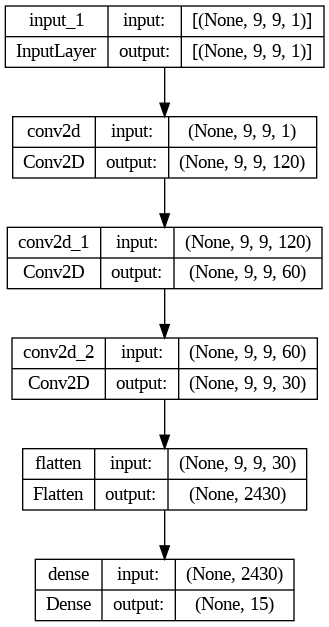

In [10]:
plot_model(model, show_shapes=True)


In [11]:
# Checkpoint
cp_path = os.path.join(MODEL_DIR_PATH, "5_2_cnn_weights-improvement-{epoch:02d}-{val_sparse_categorical_accuracy:.2f}.hdf5")
checkpoint = ModelCheckpoint(cp_path, monitor='val_sparse_categorical_accuracy', verbose=1,
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Training
df = pd.read_csv(os.path.join(PROCESSED_DIR_PATH, 'train_MachineLearningCVE.csv'), skipinitialspace=True)
logging.info("Class distribution\n{}".format(df.Label.value_counts()))

In [12]:
X, Y = preprocessing(df)
del df
X = reshape_dataset_cnn(X)

In [ ]:
# Training
logging.info("*** TRAINING START ***")
history = model.fit(X, Y, validation_split=0.1, epochs=1, batch_size=1024, verbose=True)

 357/1991 [====>.........................] - ETA: 36:13 - loss: 0.3020 - sparse_categorical_accuracy: 0.9143

In [1]:

logging.info("*** TRAINING FINISH ***")
del X, Y

NameError: name 'logging' is not defined